In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

데이터 불러오기

In [2]:
funding_rounds=pd.read_csv("funding_rounds.csv", index_col=0)
funds=pd.read_csv("funds.csv", index_col=0)
investment_partners=pd.read_csv("investment_partners.csv", index_col=0)
investments=pd.read_csv("investments.csv", index_col=0)
investors=pd.read_csv("investors.csv", index_col=0)

In [3]:
df_1=funding_rounds[['name','investment_type','raised_amount_usd','investor_count','org_uuid','org_name','lead_investor_uuids']]
df_1.head(2)

,name,investment_type,raised_amount_usd,investor_count,org_uuid,org_name,lead_investor_uuids
uuid,,,,,,,
8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,angel,500000.0,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,series_a,12700000.0,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36


In [4]:
df_1['investment_type'].value_counts()

seed                     137032
series_unknown            76601
series_a                  55523
pre_seed                  38969
grant                     35408
series_b                  27003
angel                     24487
debt_financing            20533
private_equity            16429
post_ipo_equity           13941
non_equity_assistance     13041
series_c                  12342
convertible_note           9990
undisclosed                8050
equity_crowdfunding        7587
series_d                   5224
corporate_round            5027
post_ipo_debt              3420
series_e                   2162
secondary_market           1617
product_crowdfunding       1210
initial_coin_offering       887
series_f                    789
series_g                    267
post_ipo_secondary          255
series_h                    114
series_i                     29
series_j                     19
Name: investment_type, dtype: int64

invest type이 series a,b,c에 해당하는 데이터 추출

In [5]:
df_2=df_1[(df_1['investment_type']=='series_a')|
         (df_1['investment_type']=='series_b')|
         (df_1['investment_type']=='series_c')]
df_2.head()

,name,investment_type,raised_amount_usd,investor_count,org_uuid,org_name,lead_investor_uuids
uuid,,,,,,,
d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,series_a,12700000.0,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,series_b,27500000.0,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,series_b,10500000.0,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,series_a,NaN,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c
4a56483e-d637-65fa-a2b4-abe6613e5c6b,Series B - Geni,series_b,10000000.0,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,1787528e-7bd3-a500-ba86-ac55205e7e21


In [6]:
df_2.describe()

,raised_amount_usd,investor_count
count,8.077800e+04,84625.000000
mean,1.937088e+07,3.238109
std,9.338872e+07,2.871212
min,0.000000e+00,0.000000
25%,3.230459e+06,1.000000
50%,8.000000e+06,2.000000
75%,1.800000e+07,4.000000
max,1.400000e+10,98.000000


In [7]:
series_a=df_2[df_2['investment_type']=='series_a']
series_b=df_2[df_2['investment_type']=='series_b']
series_c=df_2[df_2['investment_type']=='series_c']

In [8]:
series_a.describe()

,raised_amount_usd,investor_count
count,4.580400e+04,48518.000000
mean,1.159043e+07,2.885960
std,8.001593e+07,2.804952
min,0.000000e+00,0.000000
25%,2.244666e+06,1.000000
50%,5.093402e+06,2.000000
75%,1.070000e+07,4.000000
max,1.000000e+10,98.000000


In [9]:
series_b.describe()

,raised_amount_usd,investor_count
count,2.383100e+04,24695.000000
mean,2.396197e+07,3.522251
std,6.980542e+07,2.798398
min,0.000000e+00,0.000000
25%,6.000000e+06,2.000000
50%,1.300000e+07,3.000000
75%,2.500000e+07,5.000000
max,5.949488e+09,69.000000


In [10]:
series_c.describe()

,raised_amount_usd,investor_count
count,1.114300e+04,11412.000000
mean,4.153420e+07,4.120400
std,1.603178e+08,3.042574
min,0.000000e+00,1.000000
25%,1.000000e+07,2.000000
50%,2.000000e+07,4.000000
75%,4.500000e+07,5.000000
max,1.400000e+10,52.000000


In [17]:
df_2['org_name'].value_counts()

Super                               11
Canopy                              11
Paper Boat                          11
Plum                                10
Vestaron                            10
                                    ..
Intelligent Sensory concept          1
Relax Commerce GmbH                  1
Zugeliang                            1
Ent. Evolution                       1
B-TIME Digital Innovation Center     1
Name: org_name, Length: 55086, dtype: int64

<AxesSubplot:xlabel='raised_amount_usd', ylabel='investment_type'>

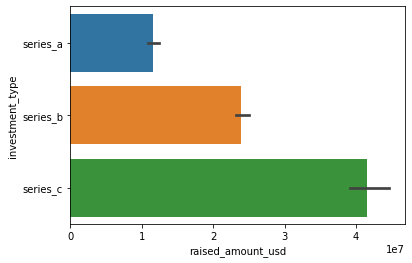

In [14]:
sns.barplot(x='raised_amount_usd',y='investment_type',data=df_2)

<AxesSubplot:xlabel='raised_amount_usd', ylabel='investment_type'>

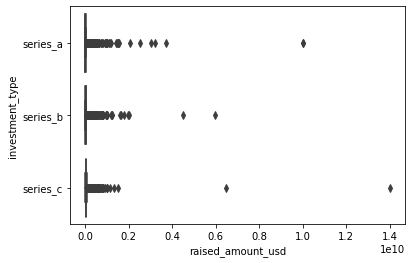

In [15]:
sns.boxplot(x='raised_amount_usd', y='investment_type', data=df_2)

One-way ANOVA

In [27]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import bartlett
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

<AxesSubplot:xlabel='raised_amount_usd', ylabel='Density'>

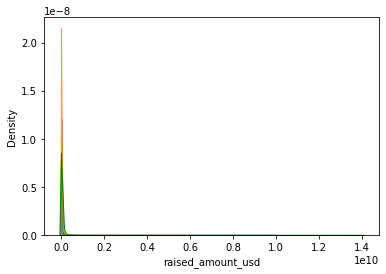

In [21]:
sns.kdeplot(data=series_a['raised_amount_usd'], color="blue", shade=True)
sns.kdeplot(data=series_b['raised_amount_usd'], color="orange", shade=True)
sns.kdeplot(data=series_c['raised_amount_usd'], color="green", shade=True)

In [48]:
A=series_a['raised_amount_usd'].dropna(axis=0)
B=series_b['raised_amount_usd'].dropna(axis=0)
C=series_c['raised_amount_usd'].dropna(axis=0)

In [55]:
print(stats.shapiro(A), 'skewness test: {}'.format(abs(stats.skew(A,bias=False))),sep='\n')
print(stats.shapiro(B), 'skewness test: {}'.format(abs(stats.skew(B,bias=False))),sep='\n')
print(stats.shapiro(C), 'skewness test: {}'.format(abs(stats.skew(C,bias=False))),sep='\n')

ShapiroResult(statistic=0.047428131103515625, pvalue=0.0)
skewness test: 92.24983774205691
ShapiroResult(statistic=0.18408167362213135, pvalue=0.0)
skewness test: 42.796262076487395
ShapiroResult(statistic=0.11000275611877441, pvalue=0.0)
skewness test: 65.53917066162593


- A의 경우, p-value가 0.05보다 작아 정규성 가정이 성립하지 않고 왜도가 2보다 크므로 정규분포를 따르지 않는다.
- B의 경우, p-value가 0.05보다 크므로 정규성 가정이 성립하고 왜도가 2보다 크므로 정규분포를 따르지 않는다.
- C의 경우, p-value가 0.05보다 크므로 정규성 가정이 성립하고 왜도가 2보다 크므로 정규분포를 따르지 않는다.

In [50]:
stats.bartlett(A, B, C)

BartlettResult(statistic=14979.377618755301, pvalue=0.0)

In [58]:
stats.levene(A, B, C)

LeveneResult(statistic=288.48150261035755, pvalue=1.4434597198947004e-125)

- p-value가 매우 작은 것으로 보아, 등분산성을 만족하지 않는다.

In [56]:
F, p=stats.f_oneway(A,B,C)
print('F-ratio: {}'.format(F), 'p-value:{}'.format(p), sep='\n')

F-ratio: 507.85421734894754
p-value:6.560077208091018e-220


- 정규성, 등분산성을 만족하지 못하지만, F-ratio 자체는 507보다 큰 값이므로, 그룹 간 평균에 차이가 있다. 또한, p-value가 유의하다.

가장 큰 값을 제거하고 분석해본 경우

In [70]:
a=series_a.sort_values(by='raised_amount_usd', ascending=False)[['raised_amount_usd']].dropna(axis=0)
b=series_b.sort_values(by='raised_amount_usd', ascending=False)[['raised_amount_usd']].dropna(axis=0)
c=series_c.sort_values(by='raised_amount_usd', ascending=False)[['raised_amount_usd']].dropna(axis=0)

In [77]:
a=a['raised_amount_usd'][1:]
b=b['raised_amount_usd'][1:]
c=c['raised_amount_usd'][1:]

In [78]:
print(stats.shapiro(a), 'skewness test: {}'.format(abs(stats.skew(a,bias=False))),sep='\n')
print(stats.shapiro(b), 'skewness test: {}'.format(abs(stats.skew(b,bias=False))),sep='\n')
print(stats.shapiro(c), 'skewness test: {}'.format(abs(stats.skew(c,bias=False))),sep='\n')

ShapiroResult(statistic=0.12037533521652222, pvalue=0.0)
skewness test: 40.78816798123342
ShapiroResult(statistic=0.3133913278579712, pvalue=0.0)
skewness test: 15.958928633612683
ShapiroResult(statistic=0.47397446632385254, pvalue=0.0)
skewness test: 6.991916628987431


- A, B, C 모두 정규성 가정이 성립하고, 비교적 왜도가 크게 줄어들었다.

In [79]:
F, p=stats.f_oneway(a,b,c)
print('F-ratio: {}'.format(F), 'p-value:{}'.format(p), sep='\n')

F-ratio: 1591.5279329132943
p-value:0.0
